G:\Next projects\Bell\Code\ablage\PR-plot
['pro_output_4.txt.dat']
['pro_output_6.txt.dat']
['pro_output_4.txt.dat']
['pro_output_2.txt.dat']


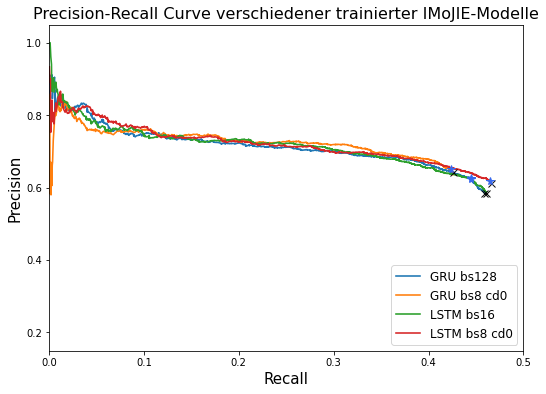

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 

def PR_curve(dir, from_model_dirs, name, models=['gru','lstm']):

    line_styles = ['-','--','-.',':']
    fig, axs = plt.subplots(1,1,figsize=(8.5,6))
    for mod in from_model_dirs:
        
        
        for _, __, files in os.walk(dir + mod.lower()): #Erhalte den Dateinamen
            for filename in files:
                if 'pro_output' in filename:
                    file = filename
                    
        lines = open(dir + mod + '/' + file, 'r').readlines()
        for i in range(len(lines)):
            lines[i] = lines[i][:-1].split('\t')
        lines = np.array([(lines[1:])]).squeeze()
        lines = np.delete(lines, 2, axis=1)       
        prec = lines[:, 0].astype(np.float64)
        rec = lines[:, 1].astype(np.float64) 
        axs.plot(rec, prec, label = mod.replace('_', ' '), linewidth=1.6)
        
    for mod in from_model_dirs:
        
        
        for _, __, files in os.walk(dir + mod): #Erhalte den Dateinamen
            print(files)
            for filename in files:
                if 'pro_output' in filename:
                    file = filename
                    
        #for i in range(len(models)):      #Erhalte für jedes Modell ein eigenes Linienmuster
        #    if dir[:dir.find('_')] == models[i]:
        #        line_style = line_styles[i]
        
        lines = open(dir + mod + '/' + file, 'r').readlines()
        for i in range(len(lines)):
            lines[i] = lines[i][:-1].split('\t')
        lines = np.array([(lines[1:])]).squeeze()
        lines = np.delete(lines, 2, axis=1)       
        prec = lines[:, 0].astype(np.float64)
        rec = lines[:, 1].astype(np.float64)   
        f1_opt_ind = np.argmax(prec*rec*2/(prec + rec))


        axs.plot(rec[-1], prec[-1], marker='x', color='black', alpha=0.96, markersize=7)
        axs.plot(rec[f1_opt_ind], prec[f1_opt_ind], marker='*', color='#3769EE', alpha=1, markersize=8)

        
    axs.set_ylim(0.149,1.05)
    axs.set_xlim(0,0.5)  
    plt.title('Precision-Recall Curve verschiedener trainierter IMoJIE-Modelle', fontsize=16)
    plt.xlabel('Recall', fontsize=15)
    plt.ylabel('Precision', fontsize=15)
    plt.legend(loc="lower right", fontsize=12)
    plt.savefig(name, dpi=12*24)
    

def main():
    print(os.getcwd())
    dir = 'G:/Next projects/Bell/Code/ablage/PR-plot/'
    PR_curve(dir=dir, from_model_dirs=['GRU_bs128','GRU_bs8_cd0', 'LSTM_bs16', 'LSTM_bs8_cd0'], name='PR_curve_best.png') 
  
  
main()  

In [4]:
a = np.zeros(10)
a[:] = np.nan
a

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])